In [97]:
# Note

### In Flter method:
     - most of the time you go with pearsons or kendall, chi2, ANOVA (depending on situation choose your method)
     - mutual info - short way to see imp features
### In wrapper method:
     - mostly people goes with RFE - (Recursive Feature Selection), 
     - Bi-directional and exhaustive are good
     - Boruta-py retunrs less number of features

In [79]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Selection Technique

Feature selection is a way of selecting a subset of most relevent features from original dataset, also we try to remove less relevant, noisy and redundant features

# for selecting best subset:
                                  ------------------------------->
set of all features ----> Generate the subset -----> Learning Algorithm + Performance

                                  <-------------------------------

# Benefits of Feature Selection:

- removes noisy features
- resmoves less imp features
- returns best set of features
- improves performance of module
- less computation cost as it reduces training and testing time
- help to reduce overfitting
- avoid curse of dimensionality

# 3 main types of feature selection: -

    - 1. Filter Method (Before Training)
    - 2. Embedded Method (After Training)
    - 3. Wrapper Method

In [2]:
# See photos from chetan's lecture - presentation

### 1. Filter Method

- 1. Correlation - pearson, spearman, kendall tau
- 2. Mutual Information / Information Gain
- 3. Missing Value Ratio
- 4. Variance Threshould Method
- 5. Chi-square test
- 6. ANOVA Test
- 7. Fisher's score
- 8. Mean Absolute Difference
- 9. Variance Inflation Factor

### 2. Embedded Method

- 1. Regularization - L1 (Lasso Regression)
- 2. Decision Tree feature importance
- 3. Random Forest feature importance
- 4. Adaboost Feature Importance
- 5. XGBoost Feature Importance

### 3. Wrapper Method

- 1. Forward Feature Selection
- 2. Backword Feature Selection
- 3. Bi-directional Feature Selection
- 4. Exhaustic Feature Selection
- 5. Recusrsive Feature Selection

# 1. Filter Method

In [3]:
# You can apply different filter methods and analyse results of all

### 1.1 Correlation

#### 1.1.1 Pearson Correlation coefficient

- variables should be continues
- should normally distributed
- relation should be linear
- outliers need to be handlled

In [4]:
from sklearn.datasets import load_boston, load_wine

In [5]:
boston_data = load_boston()
boston_df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
boston_df["target"] = boston_data.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
wine_data = load_wine()
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
wine_df["target"] = wine_data.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
corr_1 = boston_df.corr( method ="pearson").tail(1)
corr_1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
target,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


<AxesSubplot:>

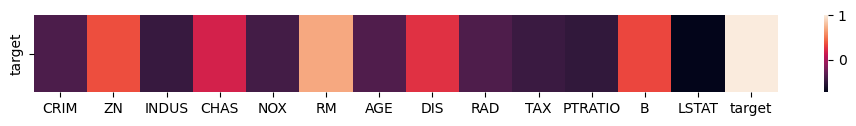

In [8]:
plt.figure(figsize=(12,1))
sns.heatmap(corr_1)

#### 1.1.2 Spearmans's Rank Correlation coefficient

- Ranges from -1 to 1
- It works well when we have linear or non-linear relationship
- variables should be continous
- works well on monotonic or non-monotonic
- determines strength and direction of monotonic relation
- little bit of outliers can be viewed

In [9]:
corr_2 = boston_df.corr( method ="spearman").tail(1)
corr_2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
target,-0.558891,0.438179,-0.578255,0.140612,-0.562609,0.633576,-0.547562,0.445857,-0.346776,-0.562411,-0.555905,0.185664,-0.852914,1.0


<AxesSubplot:>

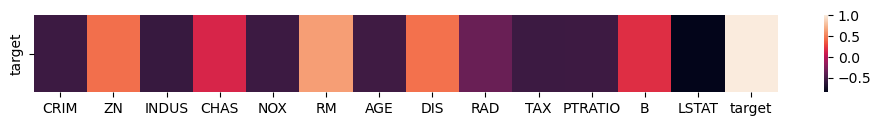

In [10]:
plt.figure(figsize=(12,1))
sns.heatmap(corr_2)

#### 1.1.3 Kendall Tau Rank Correlation coefficient

- used for categorical vs categorical data or categorical vs contineous
- It is non-parametric test that is used to measure degree of association between two variables
- It is non-parametric, so no need of normally distributed
- It best suites for discrete(categoriacal)

- Kendall is preferred than spearman because of more robustness(smaller gross sensitivity) >> GES and more efficient(smaller Asytotic Variance) >> AV

In [11]:
corr_3 = boston_df.corr( method ="kendall").tail(1)
corr_3

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
target,-0.403964,0.339989,-0.41843,0.115202,-0.394995,0.482829,-0.387758,0.313115,-0.248115,-0.41465,-0.398789,0.126955,-0.668656,1.0


<AxesSubplot:>

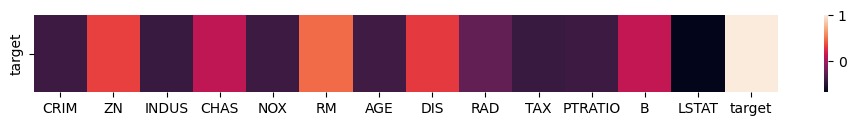

In [12]:
plt.figure(figsize=(12,1))
sns.heatmap(corr_3)

In [13]:
corr = boston_df.corr( method ="pearson")

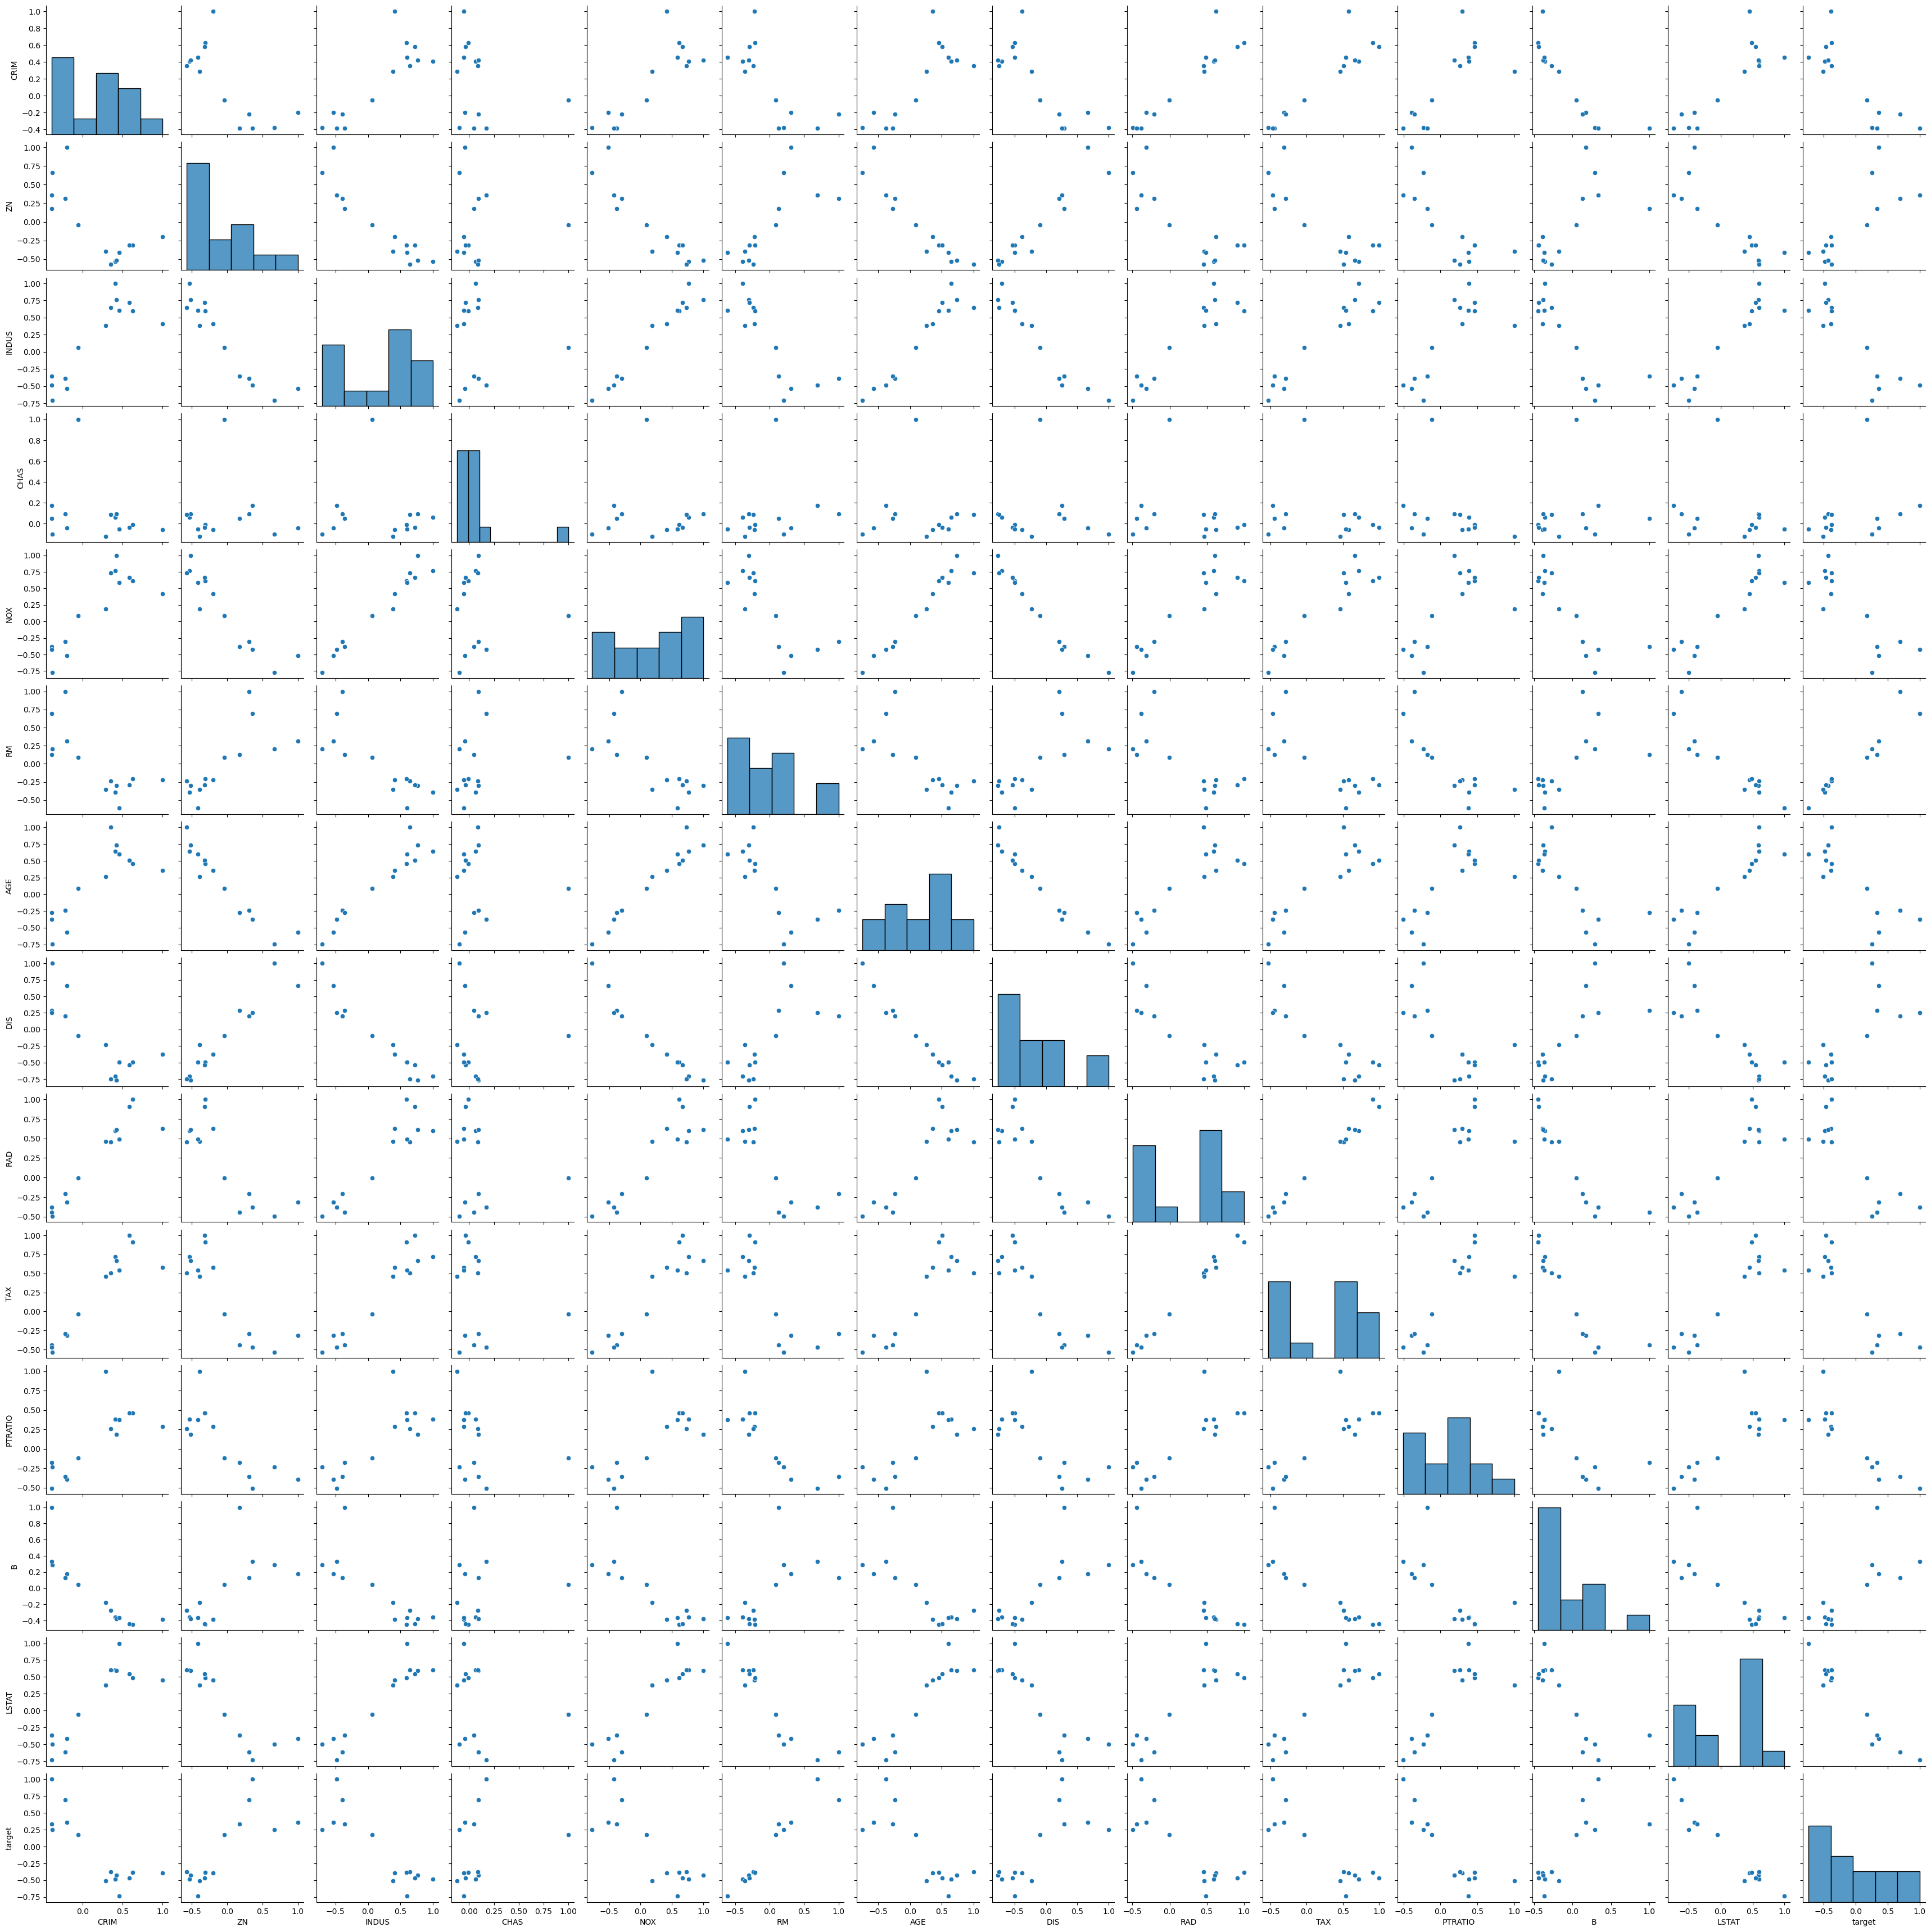

In [14]:
sns.pairplot(corr)

### 1.2 Mutual Information / Information Gain

- It ranges from 0 to 1
- It is a measure of dependence of mutual dependence between two variables

In [15]:
# classification problem

In [16]:
from sklearn.feature_selection import mutual_info_classif,mutual_info_regression

In [17]:
x_wine = wine_df.drop("target",axis = 1)
y_wine = wine_df["target"]

In [18]:
array = mutual_info_classif(x_wine,y_wine)
mutual_info = pd.Series(array,index=x_wine.columns)

In [19]:
mutual_info.sort_values(ascending=False)

flavanoids                      0.668413
proline                         0.581230
color_intensity                 0.554374
od280/od315_of_diluted_wines    0.503336
alcohol                         0.472409
hue                             0.459088
total_phenols                   0.422138
proanthocyanins                 0.301621
malic_acid                      0.290155
alcalinity_of_ash               0.266500
magnesium                       0.201184
nonflavanoid_phenols            0.120588
ash                             0.080310
dtype: float64

<AxesSubplot:>

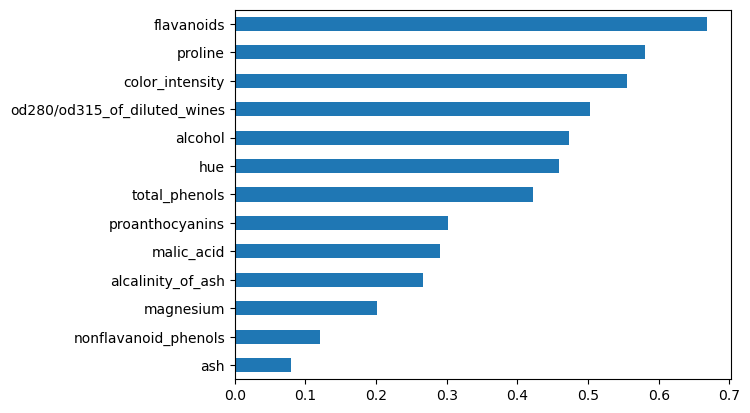

In [20]:
mutual_info.sort_values(ascending=True).plot(kind = "barh")

In [21]:
# regression problem

In [22]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
# Do train-Test split to avaoid overfitting

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_boston = boston_df.drop(labels=["target"],axis = 1)
y_boston = boston_df["target"]

In [26]:
x_train,x_test,y_train,y_test = train_test_split(
                    x_boston,
                    y_boston,
                    test_size=0.3,
                    random_state= 75)

In [27]:
array = mutual_info_regression(x_train,y_train)
mutual_info = pd.Series(array,index = x_train.columns)

In [28]:
mutual_info.sort_values(ascending= True)

CHAS       0.038226
B          0.127512
ZN         0.143563
RAD        0.230659
DIS        0.237668
AGE        0.273105
TAX        0.282518
CRIM       0.323238
NOX        0.403315
PTRATIO    0.403864
INDUS      0.448235
RM         0.518595
LSTAT      0.685258
dtype: float64

<AxesSubplot:>

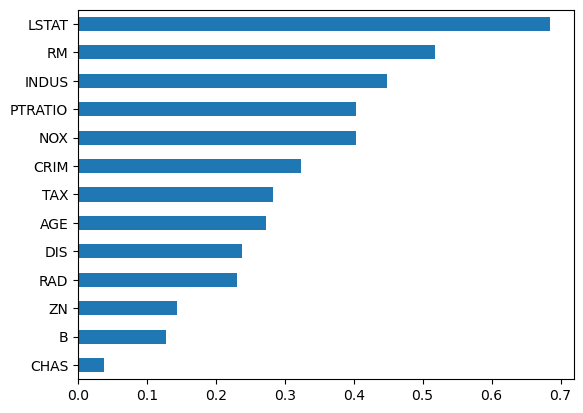

In [29]:
mutual_info.sort_values(ascending= True).plot(kind = "barh")

<AxesSubplot:>

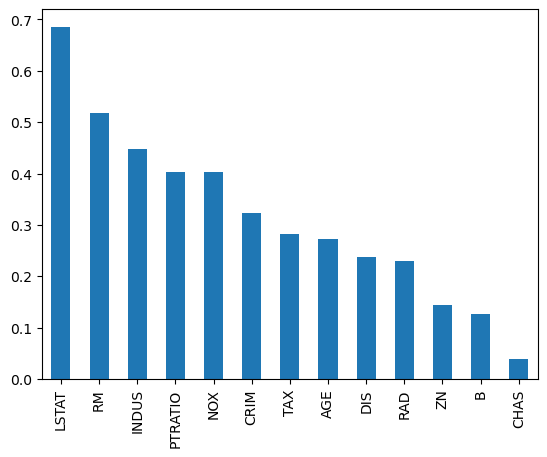

In [30]:
mutual_info.sort_values(ascending= False).plot.bar()

### We can also select k_best features

In [31]:
from sklearn.feature_selection import SelectKBest

In [32]:
sel_top_5 = SelectKBest(mutual_info_regression,k = 5)
sel_top_5.fit(x_train,y_train)

SelectKBest(k=5,
            score_func=<function mutual_info_regression at 0x0000027C1E7C21F0>)

In [33]:
sel_top_5.get_feature_names_out()

array(['INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT'], dtype=object)

In [34]:
x_train.columns[sel_top_5.get_support()]

Index(['INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT'], dtype='object')

### 1.3 Fisher's Score

- It returns a rank of variables in descending order on fisher's score
- It works well on categorical data
- Mainly preferred for binary classification
- It will be more accurate on small samples

In [56]:
# pip install skfeature

In [55]:
# pip install skfeature-chappers

In [37]:
from skfeature.function.similarity_based import fisher_score

In [38]:
array_3 = fisher_score.fisher_score(x_boston.values,y_boston)
s3 = pd.Series(array_3, index=x_boston.columns)

<AxesSubplot:>

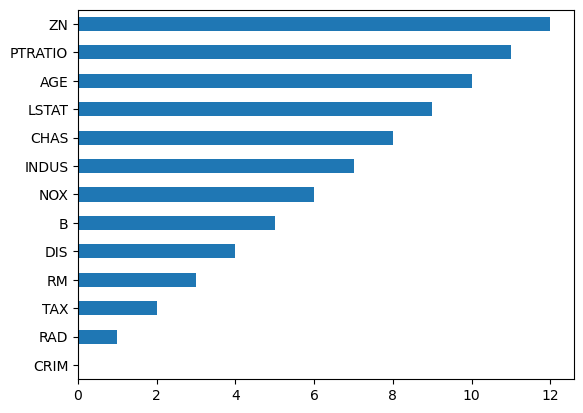

In [39]:
s3.sort_values().plot(kind = "barh")

### 1.4 Missing Values Ratios

- for continous data >> 25 % to 30 % missing values are acceptable
- ratio of missing values = no. of missing values / total number of observations * 100

In [40]:
titanic_df = pd.read_csv(r"F:\2\DATA_SETS\titanic.csv")
titanic_df.shape

(891, 12)

In [41]:
titanic_df.isna().sum() * 100 / len(titanic_df) # to calculate % of missing values

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Gender          0.336700
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [42]:
a = titanic_df.isna().mean()*100 # to calculate % of missing values
a

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Gender          0.336700
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [43]:
features = titanic_df.columns
features

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [44]:
variables = []
for i in range(len(features)):
    if a[i] <= 15:
        variables.append(features[i])     # cabin, age
variables

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Gender',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Embarked']

In [45]:
new_data = titanic_df[variables]
new_data

,PassengerId,Survived,Pclass,Name,Gender,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",NaN,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",NaN,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


In [46]:
titanic_df.shape, new_data.shape

((891, 12), (891, 10))

### 1.5 Variance Threshold Method

- works only with numerical features
- looks for variabliity in the features
- used to remove constant and cozy constant variables
- removes all features whose variance doesn't meet threshold i.e.with low variance
- Assumptions:
    - Higher variance may contain more useful information
    - Remove numerical features with low variance

In [47]:
df = wine_df.copy()
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [48]:
df.var()

alcohol                             0.659062
malic_acid                          1.248015
ash                                 0.075265
alcalinity_of_ash                  11.152686
magnesium                         203.989335
total_phenols                       0.391690
flavanoids                          0.997719
nonflavanoid_phenols                0.015489
proanthocyanins                     0.327595
color_intensity                     5.374449
hue                                 0.052245
od280/od315_of_diluted_wines        0.504086
proline                         99166.717355
target                              0.600679
dtype: float64

In [57]:
# adding two features with constant values
df["Test_1"] = 100
df["Test_2"] = 1

In [59]:
from sklearn.feature_selection import VarianceThreshold

In [60]:
var_thresh = VarianceThreshold(threshold= 0)
var_thresh.fit(df)
var_thresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False])

In [62]:
df.columns[var_thresh.get_support()]

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

### 1.6 Variance Inflation Factor

- VIF >> used to detect Multicollinearity between our independent features
- VIF is used only for independent features i.e.unsupervised things
- VIF >> 1 to infinity
- VIF > 10 >> Multicollinearity is present

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
vif_list = []
for i in range(x_wine.shape[1]):
    vif = variance_inflation_factor(x_wine.values,i)
    vif_list.append(vif)
vif_list

[206.1890565710355,
 8.925540511579014,
 165.64036999032706,
 73.14156355409301,
 67.36486845647852,
 62.78693524693161,
 35.53560246690394,
 16.63670778287286,
 17.115665485297978,
 17.022272420024827,
 45.39840748252447,
 54.539165172315194,
 16.37082766215551]

<AxesSubplot:>

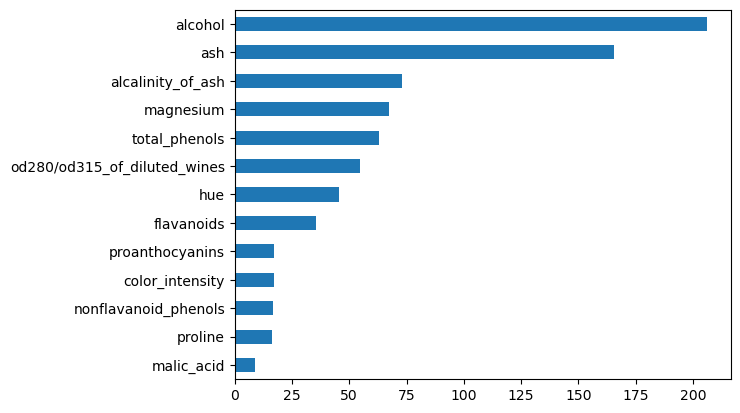

In [71]:
s4 = pd.Series(vif_list, index=x_wine.columns)
s4.sort_values().plot(kind = "barh")

In [72]:
# so, it's showing only one feature less than 10 VIF

### 1.7 Chi-square test

In [ ]:
- to check relationship between categorical variables
- It works only on categorical variables
- Suited for nominal data, ordinal data and dichotomous data(having only two values)
- cat vas cat

- Two tests
        - chi2 goodness of fit >> Determines if sample data matches the population
        - chi2 test independence
        
- Chi2 is high:
    1. Feature is imp
    2. p_val is low (<0.05)

- Chi2 is low:
    1. Features is not imp
    2. p_val is high (>0.05)
    
- Null Hypothesis (H0)  >> Two var are independent
- Alternate Hypothesis (H1) >> Two var are dependent

- when p_val >= 0.05 >> H0 is True
- when p_val < 0.05  >> H1 is True

In [73]:
from sklearn.feature_selection import chi2,SelectKBest

In [74]:
best_features = SelectKBest(chi2, k = 8)
best_features.fit(x_wine,y_wine)

SelectKBest(k=8, score_func=<function chi2 at 0x0000027C2EBAEEE0>)

In [75]:
best_features.scores_

array([5.44549882e+00, 2.80686046e+01, 7.43380598e-01, 2.93836955e+01,
       4.50263809e+01, 1.56230759e+01, 6.33343081e+01, 1.81548480e+00,
       9.36828307e+00, 1.09016647e+02, 5.18253981e+00, 2.33898834e+01,
       1.65400671e+04])

In [76]:
best_features.pvalues_

array([6.56938863e-02, 8.03489047e-07, 6.89567769e-01, 4.16304971e-07,
       1.66972759e-10, 4.05034646e-04, 1.76656548e-14, 4.03433989e-01,
       9.24066398e-03, 2.12488671e-24, 7.49248322e-02, 8.33587826e-06,
       0.00000000e+00])

In [80]:
# Using k_best
chi_df = pd.DataFrame({"Features":x_wine.columns,
                       "chi2_values":best_features.scores_,"p_values":np.around(best_features.pvalues_,3)})
chi_df

,Features,chi2_values,p_values
0,alcohol,5.445499,0.066
1,malic_acid,28.068605,0.000
2,ash,0.743381,0.690
3,alcalinity_of_ash,29.383695,0.000
4,magnesium,45.026381,0.000
5,total_phenols,15.623076,0.000
6,flavanoids,63.334308,0.000
7,nonflavanoid_phenols,1.815485,0.403
8,proanthocyanins,9.368283,0.009
9,color_intensity,109.016647,0.000


In [81]:
# Using condition
chi_df[chi_df["p_values"] <0.05]

,Features,chi2_values,p_values
1,malic_acid,28.068605,0.000
3,alcalinity_of_ash,29.383695,0.000
4,magnesium,45.026381,0.000
5,total_phenols,15.623076,0.000
6,flavanoids,63.334308,0.000
8,proanthocyanins,9.368283,0.009
9,color_intensity,109.016647,0.000
11,od280/od315_of_diluted_wines,23.389883,0.000
12,proline,16540.067145,0.000


In [83]:
# Using regular method 
chi_sqr,p_val = chi2(x_wine,y_wine)
chi_df = pd.DataFrame({"Features":x_wine.columns,
                       "chi2_values":chi_sqr,"p_values":np.around(p_val,3)})
chi_df

,Features,chi2_values,p_values
0,alcohol,5.445499,0.066
1,malic_acid,28.068605,0.000
2,ash,0.743381,0.690
3,alcalinity_of_ash,29.383695,0.000
4,magnesium,45.026381,0.000
5,total_phenols,15.623076,0.000
6,flavanoids,63.334308,0.000
7,nonflavanoid_phenols,1.815485,0.403
8,proanthocyanins,9.368283,0.009
9,color_intensity,109.016647,0.000


### 1.8 ANOVA Test

- ANOVA - Analysis of variance
- ANOVA test - To check the relationship between categorical vs continuous variables
- To check whether there is a equal variance between groups of categorical features with respect to continuous response
- If there is equal variance between groups, it means this feature has no ompact on response and it can be considered for model training.

- Null Hypothesis (H0)  >> Two var are independent
- Alternate Hypothesis (H1) >> Two var are dependent

- when p_val >= 0.05 >> H0 is True
- when p_val < 0.05  >> H1 is True

In [84]:
from sklearn.feature_selection import f_classif

In [86]:
f_val,p_val = f_classif(x_wine,y_wine)
annova_df = pd.DataFrame({"Features":x_wine.columns,
                       "chi2_values":f_val,"p_values":np.around(p_val,4)})
annova_df

,Features,chi2_values,p_values
0,alcohol,135.077624,0.0
1,malic_acid,36.943425,0.0
2,ash,13.312901,0.0
3,alcalinity_of_ash,35.771637,0.0
4,magnesium,12.429584,0.0
5,total_phenols,93.733010,0.0
6,flavanoids,233.925873,0.0
7,nonflavanoid_phenols,27.575417,0.0
8,proanthocyanins,30.271383,0.0
9,color_intensity,120.664018,0.0


In [87]:
# So, analyisis of variance is telling u all features are good with high variance

<AxesSubplot:>

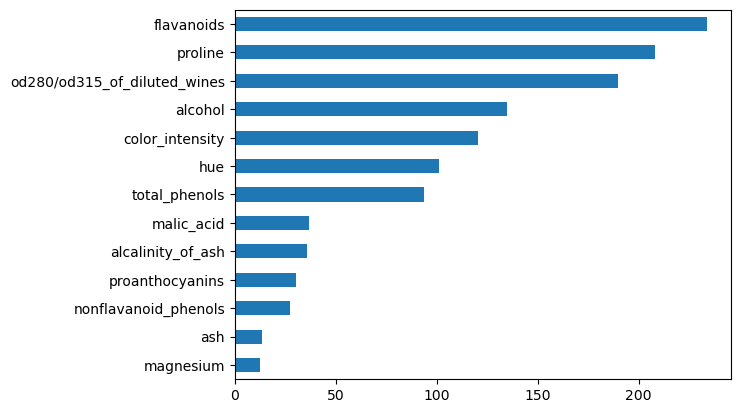

In [88]:
s5 = pd.Series(f_val, index=x_wine.columns)
s5.sort_values().plot(kind = "barh")

### 1.9 Mean Absolute Difference (MAD)

- Absolute difference from mean values of independent variables
- MAD tells us how far the values are from mean value
- formula - 

In [94]:
mean_abs_diff = np.sum(np.abs(x_wine - np.mean(x_wine, axis = 0)), axis = 0) / x_wine.shape[0]
mean_abs_diff

alcohol                           0.688462
malic_acid                        0.920277
ash                               0.209208
alcalinity_of_ash                 2.595001
magnesium                        10.999243
total_phenols                     0.536288
flavanoids                        0.858878
nonflavanoid_phenols              0.104696
proanthocyanins                   0.445893
color_intensity                   1.835831
hue                               0.186851
od280/od315_of_diluted_wines      0.611738
proline                         259.332344
dtype: float64

<AxesSubplot:>

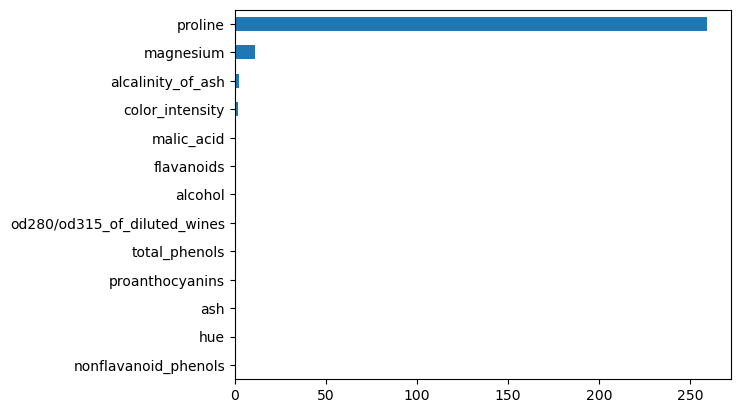

In [95]:
s6 = pd.Series(mean_abs_diff, index=x_wine.columns)
s6.sort_values().plot(kind = "barh")

<BarContainer object of 13 artists>

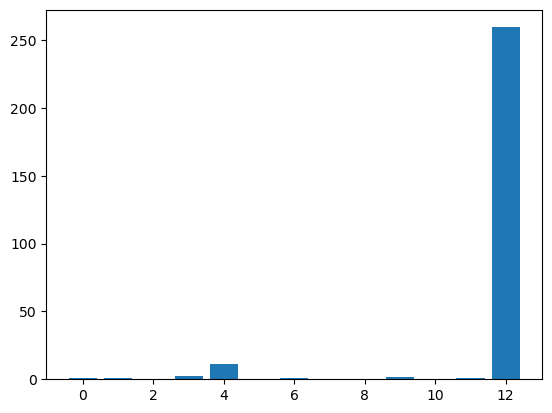

In [96]:
plt.bar(np.arange(x_wine.shape[1]),mean_abs_diff)

# 2. Wrapper Method

In [50]:
# from mlextend.feature_selection import SequentialFeatureSelector

### 2.1 Forword Feature Selection

In [98]:
x_wine,

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


#### There are two methods to use SequentialFeatureSelector

#### Method_1

In [99]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier 
      # any algorithm 
      # try different algorithms

knn_model = KNeighborsClassifier()
sfs = SequentialFeatureSelector(knn_model, n_features_to_select=5,direction="forward", n_jobs= -1, cv = 5)
sfs.fit(x_wine,y_wine)

SequentialFeatureSelector(estimator=KNeighborsClassifier(),
                          n_features_to_select=5, n_jobs=-1)

In [100]:
arr_1 = sfs.get_support()
s1= pd.Series(arr_1, index=x_wine.columns)
s1

alcohol                          True
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                       True
nonflavanoid_phenols             True
proanthocyanins                 False
color_intensity                 False
hue                              True
od280/od315_of_diluted_wines     True
proline                         False
dtype: bool

In [101]:
features = x_wine.columns[arr_1]
features

Index(['alcohol', 'flavanoids', 'nonflavanoid_phenols', 'hue',
       'od280/od315_of_diluted_wines'],
      dtype='object')

#### Method_2

In [ ]:
# pip install mlxtend

In [192]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [203]:
knn_model = KNeighborsClassifier()
sfs = SequentialFeatureSelector(knn_model, k_features=5,forward=True, n_jobs= -1, cv = 5)
                # cv_scores = cross validation score
                # forward = True  - for forward feature selection
                # forward = False - for backward feature selection
sfs.fit(x_wine,y_wine)

SequentialFeatureSelector(estimator=KNeighborsClassifier(), k_features=(5, 5),
                          n_jobs=-1, scoring='accuracy')

In [204]:
pd.DataFrame(sfs.subsets_)

,1,2,3,4,5
feature_idx,"(6,)","(0, 6)","(0, 6, 7)","(0, 6, 7, 10)","(0, 6, 7, 10, 11)"
cv_scores,"[0.6944444444444444, 0.8333333333333334, 0.694...","[0.7777777777777778, 0.9444444444444444, 0.972...","[0.8611111111111112, 0.9444444444444444, 0.972...","[0.8333333333333334, 0.9444444444444444, 0.972...","[0.7777777777777778, 0.9444444444444444, 1.0, ..."
avg_score,0.75873,0.921746,0.938413,0.938571,0.93873
feature_names,"(flavanoids,)","(alcohol, flavanoids)","(alcohol, flavanoids, nonflavanoid_phenols)","(alcohol, flavanoids, nonflavanoid_phenols, hue)","(alcohol, flavanoids, nonflavanoid_phenols, hu..."


In [205]:
pd.DataFrame(sfs.subsets_).T

,feature_idx,cv_scores,avg_score,feature_names
1,"(6,)","[0.6944444444444444, 0.8333333333333334, 0.694...",0.75873,"(flavanoids,)"
2,"(0, 6)","[0.7777777777777778, 0.9444444444444444, 0.972...",0.921746,"(alcohol, flavanoids)"
3,"(0, 6, 7)","[0.8611111111111112, 0.9444444444444444, 0.972...",0.938413,"(alcohol, flavanoids, nonflavanoid_phenols)"
4,"(0, 6, 7, 10)","[0.8333333333333334, 0.9444444444444444, 0.972...",0.938571,"(alcohol, flavanoids, nonflavanoid_phenols, hue)"
5,"(0, 6, 7, 10, 11)","[0.7777777777777778, 0.9444444444444444, 1.0, ...",0.93873,"(alcohol, flavanoids, nonflavanoid_phenols, hu..."


In [206]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

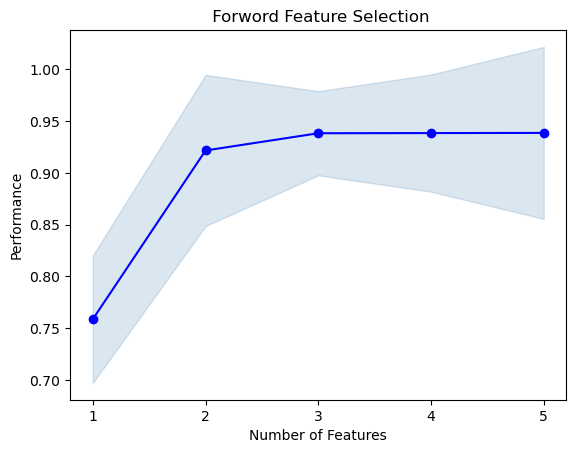

In [207]:
fig = plot_sfs(sfs.get_metric_dict())
plt.title(" Forword Feature Selection")
plt.show()

#### how to decide how many features select

#### Method_1

In [118]:
# use loops and run with different values
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
for i in range(3,12):
    sfs = SequentialFeatureSelector(knn_model, n_features_to_select=i,direction="forward", n_jobs= -1, cv = 5)
    sfs.fit(x_wine,y_wine)
    features = x_wine.columns[sfs.get_support()]
    knn_model.fit(x_wine[features],y_wine)
    accuracy = knn_model.score(x_wine[features],y_wine)
    print(i,">>",np.around(accuracy,4))

3 >> 0.9494
4 >> 0.9494
5 >> 0.9607
6 >> 0.9607
7 >> 0.9494
8 >> 0.9551
9 >> 0.9551
10 >> 0.9607
11 >> 0.9607


In [119]:
x_wine.columns[sfs.get_support()]

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'total_phenols',
       'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins',
       'color_intensity', 'hue', 'od280/od315_of_diluted_wines'],
      dtype='object')

### 2.2 Backword Feature Elimination

#### Method_1

In [140]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
sfs = SequentialFeatureSelector(knn_model, n_features_to_select=5,direction="backward", n_jobs= -1, cv = 5)
sfs.fit(x_wine,y_wine)

SequentialFeatureSelector(direction='backward',
                          estimator=KNeighborsClassifier(),
                          n_features_to_select=5, n_jobs=-1)

In [141]:
arr3 = sfs.get_support()
arr3

array([ True, False, False, False, False, False,  True, False,  True,
        True,  True, False, False])

In [143]:
features = x_wine.columns[arr3]
features

Index(['alcohol', 'flavanoids', 'proanthocyanins', 'color_intensity', 'hue'], dtype='object')

#### Method_2

In [199]:
from mlxtend.feature_selection import SequentialFeatureSelector
knn_model = KNeighborsClassifier()
# floating=False (need to be false for backword feature selection)
sfs = SequentialFeatureSelector(knn_model, k_features=5,forward=False, n_jobs= -1, cv = 5)
                # cv_scores = cross validation score
                # forward = True  - for forward feature selection
                # forward = False - for backward feature selection
sfs.fit(x_wine,y_wine)

SequentialFeatureSelector(estimator=KNeighborsClassifier(), forward=False,
                          k_features=(5, 5), n_jobs=-1, scoring='accuracy')

In [200]:
sfs.subsets_

{13: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
  'cv_scores': array([0.72222222, 0.66666667, 0.63888889, 0.65714286, 0.77142857]),
  'avg_score': 0.6912698412698413,
  'feature_names': ('alcohol',
   'malic_acid',
   'ash',
   'alcalinity_of_ash',
   'magnesium',
   'total_phenols',
   'flavanoids',
   'nonflavanoid_phenols',
   'proanthocyanins',
   'color_intensity',
   'hue',
   'od280/od315_of_diluted_wines',
   'proline')},
 12: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11),
  'cv_scores': array([0.75      , 0.77777778, 0.91666667, 0.8       , 0.85714286]),
  'avg_score': 0.8203174603174602,
  'feature_names': ('alcohol',
   'malic_acid',
   'ash',
   'alcalinity_of_ash',
   'magnesium',
   'total_phenols',
   'flavanoids',
   'nonflavanoid_phenols',
   'proanthocyanins',
   'color_intensity',
   'hue',
   'od280/od315_of_diluted_wines')},
 11: {'feature_idx': (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11),
  'cv_scores': array([0.77777778, 0.94444444, 0.91666667, 

In [201]:
pd.DataFrame(sfs.subsets_).T

,feature_idx,cv_scores,avg_score,feature_names
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7222222222222222, 0.6666666666666666, 0.638...",0.69127,"(alcohol, malic_acid, ash, alcalinity_of_ash, ..."
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)","[0.75, 0.7777777777777778, 0.9166666666666666,...",0.820317,"(alcohol, malic_acid, ash, alcalinity_of_ash, ..."
11,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11)","[0.7777777777777778, 0.9444444444444444, 0.916...",0.927778,"(alcohol, malic_acid, ash, alcalinity_of_ash, ..."
10,"(0, 1, 2, 3, 6, 7, 8, 9, 10, 11)","[0.8333333333333334, 0.9444444444444444, 0.916...",0.938889,"(alcohol, malic_acid, ash, alcalinity_of_ash, ..."
9,"(0, 1, 2, 3, 6, 7, 8, 9, 11)","[0.8333333333333334, 0.9444444444444444, 0.916...",0.938889,"(alcohol, malic_acid, ash, alcalinity_of_ash, ..."
8,"(0, 1, 2, 3, 6, 8, 9, 11)","[0.8333333333333334, 0.9444444444444444, 0.916...",0.938889,"(alcohol, malic_acid, ash, alcalinity_of_ash, ..."
7,"(0, 1, 3, 6, 8, 9, 11)","[0.8055555555555556, 0.9444444444444444, 0.916...",0.933333,"(alcohol, malic_acid, alcalinity_of_ash, flava..."
6,"(0, 1, 3, 6, 8, 9)","[0.8333333333333334, 0.9444444444444444, 0.916...",0.933175,"(alcohol, malic_acid, alcalinity_of_ash, flava..."
5,"(0, 1, 6, 8, 9)","[0.8055555555555556, 0.8888888888888888, 1.0, ...",0.92746,"(alcohol, malic_acid, flavanoids, proanthocyan..."


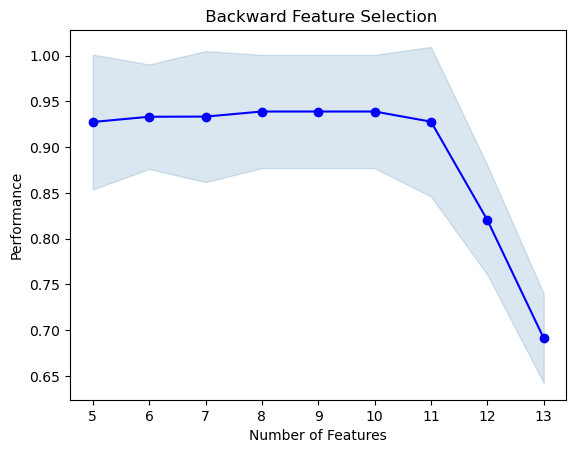

In [202]:
fig = plot_sfs(sfs.get_metric_dict())
plt.title(" Backward Feature Selection")
plt.show()

### 2.3 Bi-directional Feature Selection


In [208]:
from mlxtend.feature_selection import SequentialFeatureSelector
knn_model = KNeighborsClassifier()
# floating= True (need to be True for Bi-dirctional feature selection)
sfs = SequentialFeatureSelector(knn_model, k_features=10,floating= True, forward=True,cv = 5, n_jobs=-1, scoring="accuracy")
sfs.fit(x_wine,y_wine)

SequentialFeatureSelector(estimator=KNeighborsClassifier(), floating=True,
                          k_features=(10, 10), n_jobs=-1, scoring='accuracy')

In [209]:
pd.DataFrame(sfs.subsets_).T

,feature_idx,cv_scores,avg_score,feature_names
1,"(6,)","[0.6944444444444444, 0.8333333333333334, 0.694...",0.75873,"(flavanoids,)"
2,"(0, 6)","[0.7777777777777778, 0.9444444444444444, 0.972...",0.921746,"(alcohol, flavanoids)"
3,"(0, 6, 7)","[0.8611111111111112, 0.9444444444444444, 0.972...",0.938413,"(alcohol, flavanoids, nonflavanoid_phenols)"
4,"(0, 6, 7, 10)","[0.8333333333333334, 0.9444444444444444, 0.972...",0.938571,"(alcohol, flavanoids, nonflavanoid_phenols, hue)"
5,"(0, 6, 7, 10, 11)","[0.7777777777777778, 0.9444444444444444, 1.0, ...",0.93873,"(alcohol, flavanoids, nonflavanoid_phenols, hu..."
6,"(0, 5, 6, 7, 8, 9)","[0.8055555555555556, 0.9166666666666666, 1.0, ...",0.944444,"(alcohol, total_phenols, flavanoids, nonflavan..."
7,"(0, 2, 5, 6, 7, 8, 9)","[0.8333333333333334, 0.9166666666666666, 1.0, ...",0.944286,"(alcohol, ash, total_phenols, flavanoids, nonf..."
8,"(0, 2, 5, 6, 7, 8, 9, 10)","[0.8333333333333334, 0.8888888888888888, 1.0, ...",0.93873,"(alcohol, ash, total_phenols, flavanoids, nonf..."
9,"(0, 2, 3, 5, 6, 7, 8, 9, 10)","[0.75, 0.9166666666666666, 0.9444444444444444,...",0.922222,"(alcohol, ash, alcalinity_of_ash, total_phenol..."
10,"(0, 2, 3, 5, 6, 7, 8, 9, 10, 11)","[0.8055555555555556, 0.9166666666666666, 0.972...",0.938889,"(alcohol, ash, alcalinity_of_ash, total_phenol..."


In [210]:
# feature indexes - (0, 5, 6, 7, 8, 9) showing max accuracy of 0.944444

In [211]:
sfs.k_feature_names_

('alcohol',
 'ash',
 'alcalinity_of_ash',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines')

In [212]:
sfs.k_score_

0.9388888888888889

In [213]:
sfs.k_feature_idx_

(0, 2, 3, 5, 6, 7, 8, 9, 10, 11)

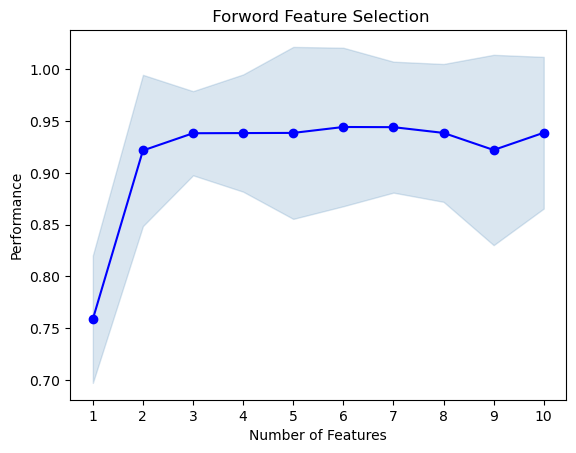

In [214]:
fig = plot_sfs(sfs.get_metric_dict())
plt.title(" Forword Feature Selection")
plt.show()

### 2.4 Recusrsive Feature Selection

#### Using tree based model - Decision Tree

In [159]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=12)
rfe = RFE(dt_model, n_features_to_select=6)
rfe.fit(x_wine,y_wine)

RFE(estimator=DecisionTreeClassifier(random_state=12), n_features_to_select=6)

In [161]:
arr3 = rfe.get_support()
arr3

array([ True, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True])

In [166]:
features = x_wine.columns[arr3]
features

Index(['alcohol', 'flavanoids', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [165]:
features = pd.Series(arr3 , index=x_wine.columns)
features

alcohol                          True
malic_acid                      False
ash                             False
alcalinity_of_ash               False
magnesium                       False
total_phenols                   False
flavanoids                       True
nonflavanoid_phenols            False
proanthocyanins                 False
color_intensity                  True
hue                              True
od280/od315_of_diluted_wines     True
proline                          True
dtype: bool

#### Using linear model - Logistic Regression

In [167]:
from sklearn. feature_selection import RFE
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
rfe = RFE(log_reg,n_features_to_select = 6)
rfe.fit(x_wine,y_wine)

RFE(estimator=LogisticRegression(), n_features_to_select=6)

In [169]:
features = x_wine.columns[rfe.get_support()]
features

Index(['alcohol', 'ash', 'flavanoids', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines'],
      dtype='object')

### 2.5 Exhaustic Feature Selection

 - In exhaustive feature selection, the performance of a machine learning algorithm is evaluated against all possible combinations of the features in the dataset.
 - Time complexity is really high
 - use only when you have so much of time

In [176]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
efs = ExhaustiveFeatureSelector(knn_model,
                     min_features=4,
                     max_features=8,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=1)
efs.fit(x_wine,y_wine)

Features: 6721/6721

ExhaustiveFeatureSelector(estimator=KNeighborsClassifier(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9], [10], [11], [12]],
                          max_features=8, min_features=4)

In [178]:
result = pd.DataFrame(efs.subsets_)
result.T

,feature_idx,cv_scores,avg_score,feature_names
0,"(0, 1, 2, 3)","[0.7222222222222222, 0.8888888888888888, 0.722...",0.792381,"(alcohol, malic_acid, ash, alcalinity_of_ash)"
1,"(0, 1, 2, 4)","[0.6111111111111112, 0.6388888888888888, 0.777...",0.668413,"(alcohol, malic_acid, ash, magnesium)"
2,"(0, 1, 2, 5)","[0.8055555555555556, 0.8888888888888888, 0.888...",0.85381,"(alcohol, malic_acid, ash, total_phenols)"
3,"(0, 1, 2, 6)","[0.8333333333333334, 0.8888888888888888, 0.944...",0.893333,"(alcohol, malic_acid, ash, flavanoids)"
4,"(0, 1, 2, 7)","[0.6944444444444444, 0.7777777777777778, 0.888...",0.763651,"(alcohol, malic_acid, ash, nonflavanoid_phenols)"
...,...,...,...,...
6716,"(4, 5, 6, 7, 9, 10, 11, 12)","[0.6944444444444444, 0.6944444444444444, 0.638...",0.69127,"(magnesium, total_phenols, flavanoids, nonflav..."
6717,"(4, 5, 6, 8, 9, 10, 11, 12)","[0.6944444444444444, 0.6944444444444444, 0.638...",0.69127,"(magnesium, total_phenols, flavanoids, proanth..."
6718,"(4, 5, 7, 8, 9, 10, 11, 12)","[0.6944444444444444, 0.6944444444444444, 0.638...",0.69127,"(magnesium, total_phenols, nonflavanoid_phenol..."
6719,"(4, 6, 7, 8, 9, 10, 11, 12)","[0.6944444444444444, 0.6944444444444444, 0.638...",0.69127,"(magnesium, flavanoids, nonflavanoid_phenols, ..."


In [179]:
efs.best_feature_names_

('alcohol',
 'total_phenols',
 'flavanoids',
 'proanthocyanins',
 'color_intensity')

In [180]:
efs.best_score_

0.9444444444444444

### 2.6 Boruta Py

https://medium.com/analytics-vidhya/feature-selection-85539d6a2a88
https://link.medium.com/8qu2YO6wXsb

In [182]:
# pip install boruta

In [187]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=12)
boruta_select = BorutaPy(rfc, n_estimators="auto")
boruta_select.fit(x_wine.values,y_wine.values)

BorutaPy(estimator=RandomForestClassifier(n_estimators=50,
                                          random_state=RandomState(MT19937) at 0x27C1E251540),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x27C1E251540)

In [191]:
boruta_ranking = boruta_select.ranking_
boruta_features = x_wine.columns[boruta_ranking <=2]
boruta_features

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

# 3. Embedded Method

Decision Tree feature importance
Random Forest feature importance
Adaboost Feature Importance
XGBoost Feature Importance

### 3.1 Regularization - L1 (Lasso Regression)

- it gives penalty to slopes

- x1 = 15 >> 0.8
- x2 = 20 >> 1.4
- x3 = 12 >> 0     (We can drop this feature)
- x4 = 13 >> 0.2 

- features = [x1,x2,x4]

### 3.2 Tree Based Feature Importance

In [216]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier(min_samples_split=2, min_samples_leaf=5,max_depth=5,random_state=12)
rfm.fit(x_wine,y_wine)

RandomForestClassifier(max_depth=5, min_samples_leaf=5, random_state=12)

In [217]:
rfm.feature_importances_

array([0.11673128, 0.02754601, 0.00700967, 0.02923795, 0.0304867 ,
       0.06426205, 0.17329863, 0.01137845, 0.01151431, 0.15382653,
       0.05584736, 0.14049325, 0.17836781])

In [218]:
np.sum(rfm.feature_importances_)

0.9999999999999999

<AxesSubplot:>

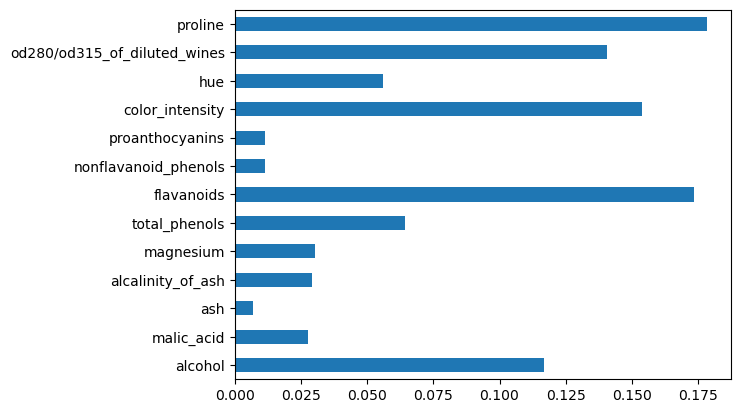

In [220]:
s5 = pd.Series(rfm.feature_importances_, index=x_wine.columns)
s5.plot(kind = "barh")